In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import math
import seaborn as sns

pd.set_option("future.no_silent_downcasting", True)
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)  

In [7]:
def load_data(file_path, target_column):
    """
    Load data for TSV files.
    
    Args:
    - file_path (str): Path to the TSV file.
    - target_column (str): The column to be used as the target for the model.
    
    Returns:
    - X, y 
    """
    # Load the data from the CSV file
    data = pd.read_csv(file_path, sep='\t')
    
    # Check for missing values (optional step)
    # data = data.dropna()
    
    # Split features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

In [8]:
rents_file_path = '../output/rents/output.csv'
rents_X, rents_y = load_data(rents_file_path, 'price')
rents_X = rents_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail','topNewDevelopment', 'superTopHighlight', 'hasStaging'])
rents_X

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,calle de Tarragona,2,es,1648,Arganzuela,False,40.402064,-3.697186,Madrid,Palos de la Frontera,23,rent,106205112,Madrid,2,13.0,{'typology': 'flat'},75.0,https://www.idealista.com/inmueble/106205112/,good,flat,"{'subtitle': 'Palos de la Frontera, Madrid', '...",False,False,False,False,False,Descubre este acogedor piso de 75 m2 ubicado e...,True,2,True,2024-10-08 17:52:00.177426
1,"calle de Pelayo, 59",1,es,961,Centro,False,40.424953,-3.697004,Madrid,Chueca-Justicia,13,rent,101319801,Madrid,0,19.0,"{'typology': 'flat', 'subTypology': 'studio'}",45.0,https://www.idealista.com/inmueble/101319801/,good,studio,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",True,False,False,False,False,"Para más viviendas como está, visita nuestra p...",False,4,True,2024-10-08 17:52:00.182339
2,calle de Alcántara,1,es,2745,Barrio de Salamanca,False,40.429930,-3.672965,Madrid,Lista,14,rent,103265138,Madrid,1,26.0,{'typology': 'flat'},46.0,https://www.idealista.com/inmueble/103265138/,good,flat,"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...",False,False,False,False,False,DISPONIBLE EN ENERO 2025 - CONTRATO TEMPORAL p...,False,1,True,2024-10-08 18:44:38.777702
3,calle de Treviño,1,es,3369,Chamberí,True,40.446859,-3.704064,Madrid,Nuevos Ministerios-Ríos Rosas,27,rent,106204986,Madrid,1,31.0,{'typology': 'flat'},39.0,https://www.idealista.com/inmueble/106204986/,good,flat,"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...",False,False,True,False,False,¡Bienvenido a tu nuevo hogar en Chamberí! Expl...,False,5,True,2024-10-08 18:44:38.777850
4,calle de Almadén,1,es,675,Centro,False,40.411566,-3.696059,Madrid,Huertas-Cortes,21,rent,106193108,Madrid,2,26.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/106193108/,good,flat,"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",False,False,False,False,False,¡Descubre tu nuevo hogar en el corazón del emb...,True,1,False,2024-10-08 18:44:38.778482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,calle de Ponzano,1,es,2421,Chamberí,False,40.438467,-3.700359,Madrid,Almagro,1,rent,106528058,Madrid,0,39.0,"{'typology': 'flat', 'subTypology': 'studio'}",32.0,https://www.idealista.com/inmueble/106528058/,good,studio,"{'subtitle': 'Almagro, Madrid', 'title': 'Estu...",False,False,False,False,False,Estudio amueblado y equipado en muy buena finc...,False,3,True,2024-11-14 12:21:50.014672
2663,"calle de la Batalla del Salado, 7",2,es,1507,Arganzuela,True,40.403602,-3.695700,Madrid,Palos de la Frontera,13,rent,106488614,Madrid,3,18.0,{'typology': 'flat'},100.0,https://www.idealista.com/inmueble/106488614/,good,flat,"{'subtitle': 'Palos de la Frontera, Madrid', '...",True,False,False,False,False,Se alquila magnífico piso de 3 dormitorios. Am...,True,3,True,2024-11-14 12:21:50.014725
2664,calle del Puerto de Maspalomas,1,es,7051,Fuencarral,False,40.479224,-3.714183,Madrid,Pilar,13,rent,106176221,Madrid,1,19.0,{'typology': 'flat'},47.0,https://www.idealista.com/inmueble/106176221/,good,flat,"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...",False,False,False,False,False,"REF. 705/3259. Apartamento de un dormitorio, s...",True,6,True,2024-11-14 12:21:50.014780
2665,Barrio Concepción,1,es,4009,Ciudad Lineal,False,40.432032,-3.657482,Madrid,Concepción,7,rent,106511053,Madrid,2,18.0,{'typology': 'flat'},62.0,https://www.idealista.com/inmueble/106511053/,good,flat,"{'subtitle': 'Concepción, Madrid', 'title': 'P...",False,False,False,False,False,"Oportunidad! Piso muy céntrico, haciendo esqu...",True,3,False,2024-11-14 12:21:50.014833


In [9]:
sales_file_path = '../output/sales/output.csv'
sales_X, sales_y = load_data(sales_file_path, 'price')
sales_X = sales_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail', 'topNewDevelopment', 'superTopHighlight', 'hasStaging'])
sales_X

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,barrio Malasaña-Universidad,1,es,1209,Centro,False,40.425749,-3.708247,Madrid,Malasaña-Universidad,6,sale,106159216,Madrid,1,6875.0,{'typology': 'flat'},40.0,https://www.idealista.com/inmueble/106159216/,good,flat,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,False,False,False,La Inmobiliaria Internacional CPM gestiona est...,False,2,False,2024-10-08 18:44:38.431657
1,calle de Juan Tornero,1,es,2480,Latina,False,40.410385,-3.728450,Madrid,Puerta del Ángel,23,sale,106205384,Madrid,3,3621.0,{'typology': 'flat'},66.0,https://www.idealista.com/inmueble/106205384/,good,flat,"{'subtitle': 'Puerta del Ángel, Madrid', 'titl...",False,False,True,False,False,¡Descubre tu nuevo hogar en el corazón de Madr...,True,4,True,2024-10-08 18:44:38.432450
2,calle de Arganzuela,2,es,1176,Centro,True,40.409503,-3.710546,Madrid,Lavapiés-Embajadores,32,sale,105960153,Madrid,2,5540.0,{'typology': 'flat'},63.0,https://www.idealista.com/inmueble/105960153/,good,flat,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",False,False,True,True,False,Descubre esta espectacular vivienda recién ref...,False,1,True,2024-10-10 12:28:59.029327
3,calle de Emilio Carrere,1,es,1678,Chamberí,False,40.430535,-3.708256,Madrid,Arapiles,33,sale,106057681,Madrid,1,5763.0,{'typology': 'flat'},59.0,https://www.idealista.com/inmueble/106057681/,renew,flat,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...",False,False,True,True,False,Fantástico apartamento luminoso a patio de man...,False,1,True,2024-10-10 12:28:59.029453
4,calle de la Ballesta,1,es,708,Centro,True,40.422297,-3.704335,Madrid,Malasaña-Universidad,22,sale,106144167,Madrid,1,7865.0,{'typology': 'flat'},37.0,https://www.idealista.com/inmueble/106144167/,good,flat,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",False,False,True,False,True,GLOBALPISO MALASAÑA VENDE fantástica vivienda ...,False,1,False,2024-10-10 12:28:59.029566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,Barrio Ciudad Universitaria,1,es,3387,Moncloa,False,40.445764,-3.712310,Madrid,Ciudad Universitaria,0,sale,106544517,Madrid,2,4400.0,{'typology': 'flat'},80.0,https://www.idealista.com/inmueble/106544517/,renew,flat,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",False,False,False,False,False,"Piso muy luminoso, exterior con 3 dormitorios,...",True,2,False,2024-11-14 12:21:42.113907
2439,calle del Doctor Cortezo s/n,1,es,455,Centro,False,40.413506,-3.703725,Madrid,Lavapiés-Embajadores,0,sale,106532522,Madrid,0,6389.0,"{'typology': 'flat', 'subTypology': 'studio'}",36.0,https://www.idealista.com/inmueble/106532522/,good,studio,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",True,False,False,False,False,Agencia inmobiliaria Activa Casa de Madrid Cen...,True,1,True,2024-11-14 12:21:42.113986
2440,calle Carlos Marín,1,es,3674,Usera,False,40.384136,-3.707823,Madrid,Pradolongo,0,sale,106533394,Madrid,2,3308.0,{'typology': 'flat'},65.0,https://www.idealista.com/inmueble/106533394/,good,flat,"{'subtitle': 'Pradolongo, Madrid', 'title': 'P...",False,False,False,False,False,piso de 2 dormitorios con 2 terrazas (una acri...,True,2,False,2024-11-14 12:21:42.114061
2441,camino de Perales,1,es,3816,Usera,False,40.382591,-3.695155,Madrid,Almendrales,0,sale,106500096,Madrid,2,2662.0,{'typology': 'flat'},65.0,https://www.idealista.com/inmueble/106500096/,renew,flat,"{'subtitle': 'Almendrales, Madrid', 'title': '...",False,False,False,False,False,Piso de 2 dormitorios cocina amueblada baño co...,True,8,True,2024-11-14 12:21:42.114127


In [10]:
sales_X['status'].value_counts()

status
good              1960
renew              408
newdevelopment      68
unknown              7
Name: count, dtype: int64

In [11]:
sales_X.isnull().sum()

address             0
bathrooms           0
country             0
distance            0
district            0
hasVideo            0
latitude            0
longitude           0
municipality        0
neighborhood        0
numPhotos           0
operation           0
propertyCode        0
province            0
rooms               0
priceByArea         0
detailedType        0
size                0
url                 0
status              0
propertyType        0
suggestedTexts      0
showAddress         0
newDevelopment      0
hasPlan             0
has3DTour           0
has360              0
description         9
exterior            0
floor             137
hasLift            38
created             0
dtype: int64

In [12]:
rents_X.isnull().sum()

address             0
bathrooms           0
country             0
distance            0
district            0
hasVideo            0
latitude            0
longitude           0
municipality        0
neighborhood        0
numPhotos           0
operation           0
propertyCode        0
province            0
rooms               0
priceByArea         0
detailedType        0
size                0
url                 0
status              0
propertyType        0
suggestedTexts      0
showAddress         0
newDevelopment      0
hasPlan             0
has3DTour           0
has360              0
description         5
exterior            0
floor             120
hasLift            16
created             0
dtype: int64

In [13]:
def transform_hasLift(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['hasLift'].isna()), 'hasLift'] = False
    return df

def transformed_floor(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['floor'].isna()), 'floor'] = '-1'
    return df

def add_bare_title(df):
    df['bare_tittle'] = df['description'].fillna('').str.contains('nuda', case=False).astype(int)
    return df

def index_bare_title_positives(df):
    return df.index[df['bare_tittle'] == 1].tolist()

def index_bassement_possitives(df):
    return df.index[df['isBassement'] == 1].tolist()

def add_is_bassement(df):
    df['isBassement'] = df['floor'].fillna('None').isin(['bj', 'ss', 'st', '-1', '-2', 'en']).astype(int)
    return df

rents_X = transform_hasLift(rents_X)
rents_X = transformed_floor(rents_X)
rents_X = add_is_bassement(rents_X)
sales_X = transform_hasLift(sales_X)
sales_X = transformed_floor(sales_X)
sales_X = add_bare_title(sales_X)
sales_X = add_is_bassement(sales_X)
bare_title_index = index_bare_title_positives(sales_X)
sales_X = sales_X.drop(bare_title_index, axis=0)
sales_y = sales_y.drop(bare_title_index, axis=0)
bassement_index = index_bassement_possitives(rents_X)
rents_X = rents_X.drop(bassement_index, axis=0)
rents_y = rents_y.drop(bassement_index, axis=0)

In [14]:
sales_X.isnull().sum() 

address            0
bathrooms          0
country            0
distance           0
district           0
hasVideo           0
latitude           0
longitude          0
municipality       0
neighborhood       0
numPhotos          0
operation          0
propertyCode       0
province           0
rooms              0
priceByArea        0
detailedType       0
size               0
url                0
status             0
propertyType       0
suggestedTexts     0
showAddress        0
newDevelopment     0
hasPlan            0
has3DTour          0
has360             0
description        9
exterior           0
floor             33
hasLift           31
created            0
bare_tittle        0
isBassement        0
dtype: int64

In [15]:
rents_X.isnull().sum()

address           0
bathrooms         0
country           0
distance          0
district          0
hasVideo          0
latitude          0
longitude         0
municipality      0
neighborhood      0
numPhotos         0
operation         0
propertyCode      0
province          0
rooms             0
priceByArea       0
detailedType      0
size              0
url               0
status            0
propertyType      0
suggestedTexts    0
showAddress       0
newDevelopment    0
hasPlan           0
has3DTour         0
has360            0
description       2
exterior          0
floor             8
hasLift           7
created           0
isBassement       0
dtype: int64

In [16]:
sales_X[sales_X.isna().any(axis=1)]

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,bare_tittle,isBassement
26,calle de Salvador Martínez,2,es,5693,Usera,False,40.365540,-3.697273,Madrid,12 de Octubre-Orcasur,33,sale,105570267,Madrid,3,2184.0,"{'typology': 'chalet', 'subTypology': 'terrace...",114.0,https://www.idealista.com/inmueble/105570267/,good,chalet,"{'subtitle': '12 de Octubre-Orcasur, Madrid', ...",False,False,True,True,False,CONTACTAR CON LA EXTENSIÓN Nº1 No cobramos al ...,False,NaN,NaN,2024-10-10 12:28:59.033021,0,0
35,calle de la Sierra de la Solana,2,es,4107,Puente de Vallecas,False,40.388150,-3.669544,Madrid,San Diego,30,sale,106006987,Madrid,3,2701.0,"{'typology': 'chalet', 'subTypology': 'terrace...",107.0,https://www.idealista.com/inmueble/106006987/,good,chalet,"{'subtitle': 'San Diego, Madrid', 'title': 'Ch...",False,False,True,True,False,MARCAR LA EXTENSIÓN Nº 3 ¡No cobramos al compr...,False,NaN,NaN,2024-10-10 12:28:59.034006,0,0
90,barrio Colina,1,es,5948,Ciudad Lineal,True,40.461174,-3.661306,Madrid,Colina,35,sale,105937686,Madrid,1,5896.0,"{'typology': 'chalet', 'subTypology': 'indepen...",67.0,https://www.idealista.com/inmueble/105937686/,good,chalet,"{'subtitle': 'Colina, Madrid', 'title': 'Casa ...",False,False,True,False,True,Suma inmobiliaria presenta en EXCLUSIVA casa i...,False,NaN,NaN,2024-10-10 12:28:59.457652,0,0
108,calle de Cestona,3,es,5221,Usera,False,40.371221,-3.715781,Madrid,Orcasitas,32,sale,106042137,Madrid,3,3947.0,{'typology': 'chalet'},95.0,https://www.idealista.com/inmueble/106042137/,good,chalet,"{'subtitle': 'Orcasitas, Madrid', 'title': 'Ch...",False,False,True,False,True,Housfy vende precioso Chalet adosado con refor...,False,NaN,NaN,2024-10-10 12:28:59.928162,0,0
126,calle de Alonso Núñez,1,es,4619,Tetuán,True,40.457376,-3.711396,Madrid,Berruguete,31,sale,106032469,Madrid,1,4975.0,"{'typology': 'chalet', 'subTypology': 'indepen...",40.0,https://www.idealista.com/inmueble/106032469/,good,chalet,"{'subtitle': 'Berruguete, Madrid', 'title': 'C...",False,False,True,False,True,¡Descubre tu nuevo hogar en el corazón de la c...,False,NaN,NaN,2024-10-10 12:29:00.610984,0,0
242,calle de Egipto,2,es,6455,San Blas,False,40.433336,-3.627285,Madrid,Simancas,47,sale,106163287,Madrid,2,3343.0,{'typology': 'chalet'},70.0,https://www.idealista.com/inmueble/106163287/,good,chalet,"{'subtitle': 'Simancas, Madrid', 'title': 'Cha...",False,False,True,False,False,Preciosa casa a la venta en el barrio de Siman...,False,NaN,NaN,2024-10-10 12:29:01.613768,0,0
377,calle de San Magín,1,es,3883,Usera,False,40.384217,-3.717223,Madrid,Zofío,21,sale,105960943,Madrid,3,3014.0,{'typology': 'flat'},73.0,https://www.idealista.com/inmueble/105960943/,good,flat,"{'subtitle': 'Zofío, Madrid', 'title': 'Piso e...",False,False,False,False,False,NaN,True,1,True,2024-10-10 12:29:02.889786,0,0
411,calle de Pelayo,1,es,924,Centro,False,40.424508,-3.696634,Madrid,Chueca-Justicia,21,sale,106127183,Madrid,1,5829.0,{'typology': 'flat'},41.0,https://www.idealista.com/inmueble/106127183/,renew,flat,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...",False,False,False,False,False,NaN,False,3,False,2024-10-10 12:29:03.305885,0,0
423,barrio Valdeacederas,2,es,5823,Tetuán,False,40.469048,-3.701823,Madrid,Valdeacederas,61,sale,106068317,Madrid,4,3455.0,{'typology': 'flat'},110.0,https://www.idealista.com/inmueble/106068317/,good,flat,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",False,False,False,False,False,NaN,True,2,False,2024-10-10 12:29:03.306995,0,0
513,barrio Entrevías,1,es,4647,Puente de Vallecas,False,40.380736,-3.672359,Madrid,Entrevías,21,sale,106143113,Madrid,2,2826.0,"{'typology': 'chalet', 'subTypology': 'terrace...",69.0,https://www.idealista.com/inmueble/106143113/,good,chalet,"{'subt

In [17]:
rents_X[rents_X.isna().any(axis=1)]

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,isBassement
164,calle Rochapea,1,es,5259,Usera,False,40.370112,-3.689496,Madrid,San Fermín,21,rent,106158854,Madrid,2,20.0,"{'typology': 'chalet', 'subTypology': 'terrace...",70.0,https://www.idealista.com/inmueble/106158854/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",False,False,False,False,False,SERVICHECK ALQUILA INCREIBLE CHALET Esta es un...,False,NaN,NaN,2024-10-10 12:29:12.805106,0
365,"calle Taconera, 69",1,es,5201,Usera,False,40.370391,-3.691524,Madrid,San Fermín,27,rent,106197819,Madrid,3,17.0,"{'typology': 'chalet', 'subTypology': 'indepen...",71.0,https://www.idealista.com/inmueble/106197819/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",True,False,False,False,False,Vivienda unifamiliar REFORMADA A ESTRENAR de 7...,False,NaN,NaN,2024-10-10 12:29:14.321347,0
600,calle Rafaela Pascual,1,es,5460,Moncloa,False,40.462754,-3.722710,Madrid,Ciudad Universitaria,36,rent,105957846,Madrid,2,39.0,{'typology': 'chalet'},40.0,https://www.idealista.com/inmueble/105957846/,good,chalet,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",False,False,False,False,False,RESERVAS E INQUIETUDES Para obtener informació...,False,NaN,NaN,2024-10-10 12:29:15.946025,0
614,barrio Arcos,2,es,7479,San Blas,False,40.427217,-3.613068,Madrid,Arcos,17,rent,106177541,Madrid,3,14.0,"{'typology': 'chalet', 'subTypology': 'terrace...",90.0,https://www.idealista.com/inmueble/106177541/,good,chalet,"{'subtitle': 'Arcos, Madrid', 'title': 'Chalet...",False,False,False,False,False,Donpiso alquila en exclusiva espectacular casa...,False,NaN,NaN,2024-10-10 12:29:16.271258,0
783,calle de Narváez,2,es,2005,Barrio de Salamanca,False,40.421919,-3.677675,Madrid,Goya,32,rent,106115782,Madrid,2,35.0,"{'typology': 'chalet', 'subTypology': 'indepen...",55.0,https://www.idealista.com/inmueble/106115782/,good,chalet,"{'subtitle': 'Goya, Madrid', 'title': 'Casa in...",False,False,True,False,False,DÚPLEX RECIÉN REFORMADO A ESTRENAR Vivienda in...,False,NaN,NaN,2024-10-10 12:29:17.596564,0
836,"calle Taconera, 69",1,es,5201,Usera,True,40.370391,-3.691524,Madrid,San Fermín,27,rent,106103166,Madrid,3,17.0,"{'typology': 'chalet', 'subTypology': 'indepen...",71.0,https://www.idealista.com/inmueble/106103166/,good,chalet,"{'subtitle': 'San Fermín, Madrid', 'title': 'C...",True,False,False,False,False,Vivienda unifamiliar REFORMADA A ESTRENAR de 7...,False,NaN,NaN,2024-10-10 12:29:18.344492,0
1010,calle de Donoso Cortés,1,es,2473,Chamberí,False,40.437691,-3.710002,Madrid,Arapiles,24,rent,106163752,Madrid,2,26.0,{'typology': 'flat'},72.0,https://www.idealista.com/inmueble/106163752/,good,flat,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...",False,False,True,False,False,NaN,True,6,True,2024-10-10 12:29:19.562563,0
1525,calle de Seco,2,es,3226,Retiro,True,40.397218,-3.672085,Madrid,Adelfas,30,rent,106288355,Madrid,2,18.0,{'typology': 'flat'},70.0,https://www.idealista.com/inmueble/106288355/,good,flat,"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso...",False,False,False,False,False,NaN,True,7,True,2024-10-18 12:44:19.585057,0
2057,calle San Martín de Porres,1,es,6586,Moncloa,False,40.471960,-3.728364,Madrid,Ciudad Universitaria,46,rent,106549345,Madrid,1,18.0,"{'typology': 'flat', 'subTypology': 'duplex'}",55.0,https://www.idealista.com/inmueble/106549345/,good,duplex,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",False,False,True,False,False,Disponible a partir del 26 de diciembre. Este ...,True,NaN,False,2024-11-14 12:21:42.899271,0
2375,calle de Alejandro Dumas,1,es,1977,Arganzuela,False,40.405115,-3.718079,Madrid,Imperial,36,rent,106403355,Madrid,1,24.0,{'typology': 'chalet'},60.0,https://www.idealista.com/inmueble/106403355/,

In [18]:
class MapFloorValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Nothing to fit here
    
    def get_feature_names_out(self, input_features=None):
        return input_features
    
    def _map_values(self, x):
        if isinstance(x, str) and x.isdigit():
            return int(x) 
        if pd.isna(x):
            return np.nan
        match x: 
            case 'bj':
                return -1
            case 'en':
                return 0
            case 'ss':
                return -1
            case 'st':
                return -1
            case '-1':
                return -1
            case '-2':
                return -2
            case _:
                assert False, f"The value {x} of type {type(x)} does not comply"

    def transform(self, X):
        # Replace the target values with 0
        return X.map(self._map_values)

class StatusValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the mapping of values to integers
        self.mapping = {
            'renew': 1,
            'unknown': 0,
            'newdevelopment': 3,
            'good': 2
        }

    def get_feature_names_out(self, input_features=None):
        return input_features

    def fit(self, X, y=None):
        # Fit does not need to do anything in this case
        return self

    def transform(self, X):
        # Check if X is a DataFrame and if the column exists
        if isinstance(X, pd.DataFrame):
            # Apply the mapping to the column
            return X.replace(self.mapping).infer_objects(copy=False)
        else:
            raise ValueError("Input should be a pandas DataFrame.")

In [19]:
# Define the preprocessing steps
categorical_features = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift']
numerical_features = ['bathrooms', 'size', 'rooms']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), categorical_features)  # One-hot encode categorical features
    ]
)

sales_X_transformed = pd.DataFrame(preprocessor.fit_transform(sales_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

rents_X_transformed = pd.DataFrame(preprocessor.fit_transform(rents_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

<Axes: xlabel='None', ylabel='None'>

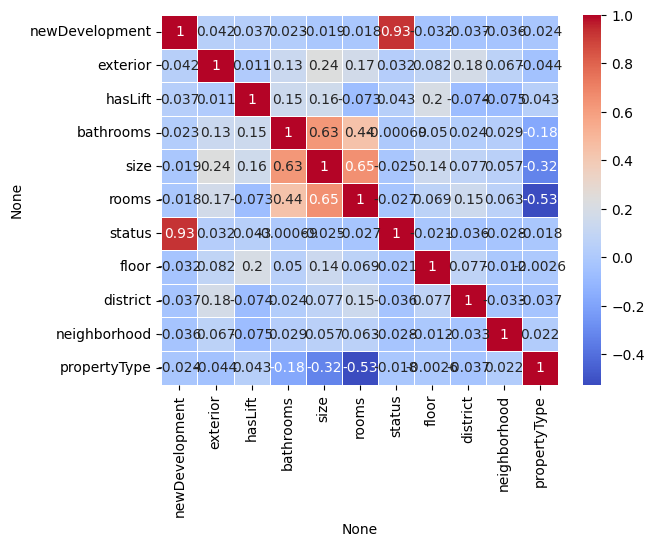

In [20]:
sns.heatmap(rents_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='None', ylabel='None'>

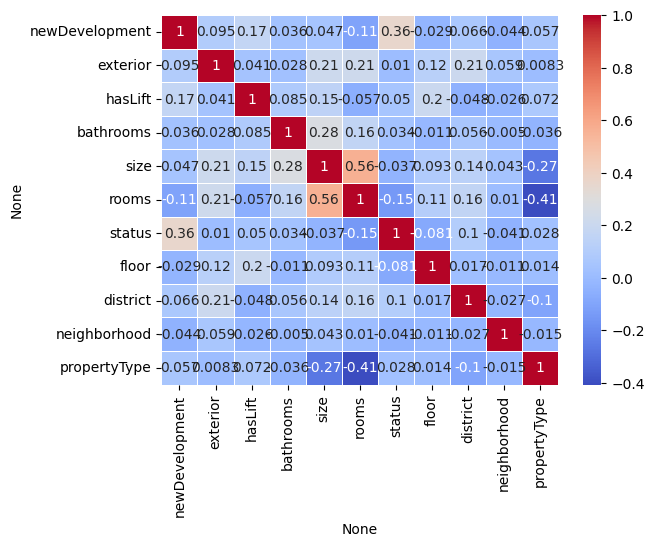

In [21]:
# Matriz de correlación
sns.heatmap(sales_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [22]:
rents_X_train, rents_X_test, rents_y_train, rents_y_test = train_test_split(rents_X, rents_y, test_size=0.2, random_state=42)
sales_X_train, sales_X_test, sales_y_train, sales_y_test = train_test_split(sales_X, sales_y, test_size=0.2, random_state=42)


In [23]:
# Create a bar plot for feature importances
def plot_feature_importance(importances, feature_names):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), feature_names[indices])
    plt.xlabel("Relative Importance")
    plt.show()

def print_mean_square_error(pipeline: Pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_preds = pipeline.predict(X_test)
    mse_sales = root_mean_squared_error(y_preds, y_test)
    print(f'Mean Squared Error: {mse_sales:.2f}')


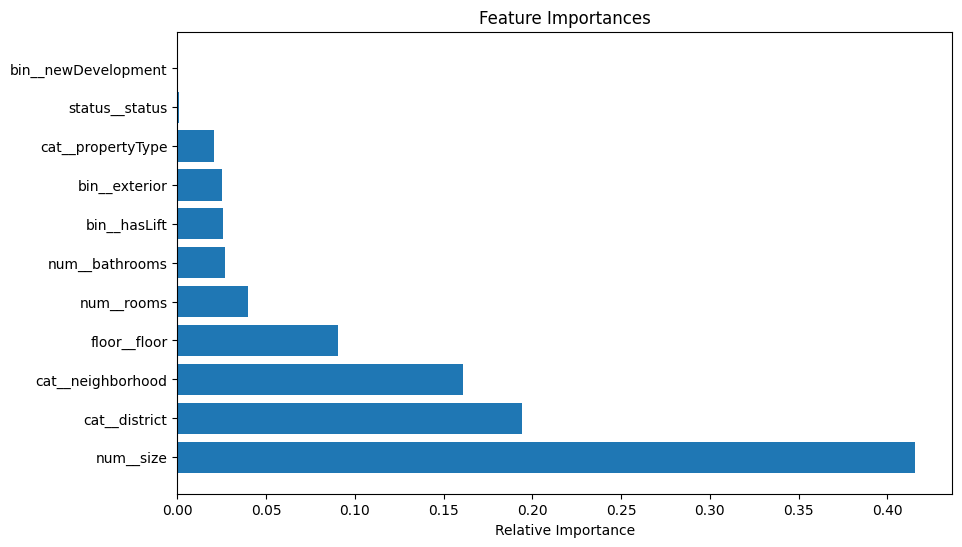

In [24]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])
model_pipeline.fit(rents_X_train, rents_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)


In [25]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 213.73


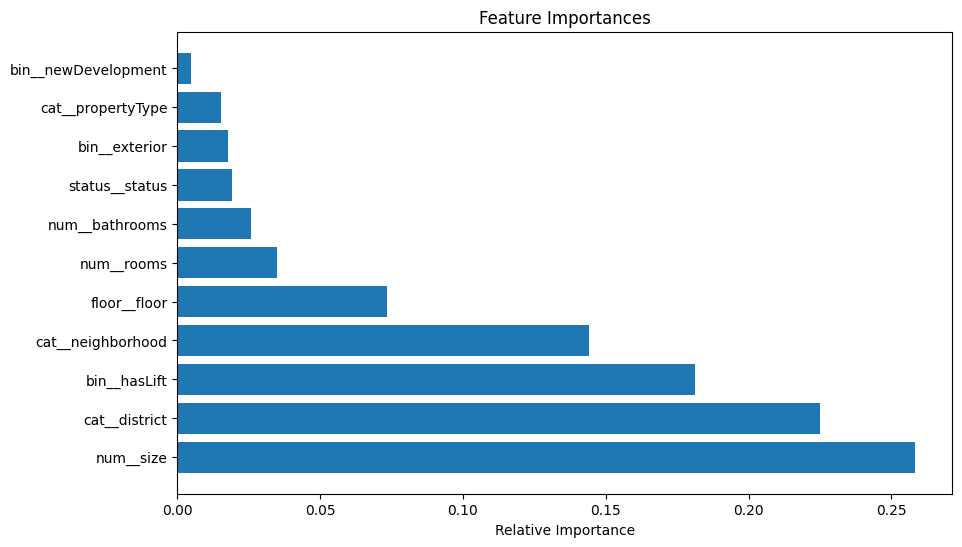

In [26]:
model_pipeline.fit(sales_X_train, sales_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)

In [27]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:
Mean Squared Error: 46990.75


In [28]:
# Define the preprocessing steps
non_ordinal_categorical = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift']
numerical_features = ['bathrooms', 'size', 'rooms']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('non_ordinal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), non_ordinal_categorical)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])

In [29]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 207.85


In [30]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:
Mean Squared Error: 45824.70


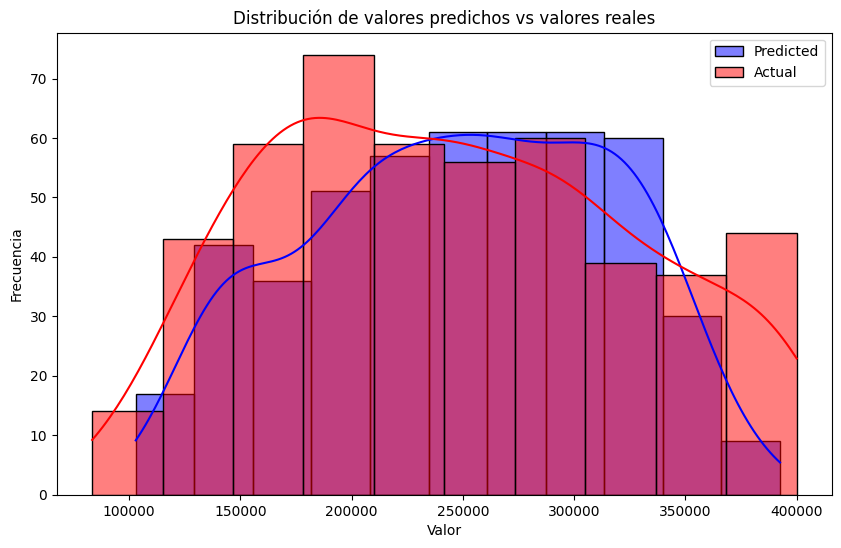

In [31]:
# Histograma de los valores predichos
model_pipeline.fit(sales_X_train, sales_y_train)
sales_y_preds = model_pipeline.predict(sales_X_test)
plt.figure(figsize=(10,6))
sns.histplot(sales_y_preds, kde=True, color='blue', label='Predicted')
sns.histplot(sales_y_test, kde=True, color='red', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

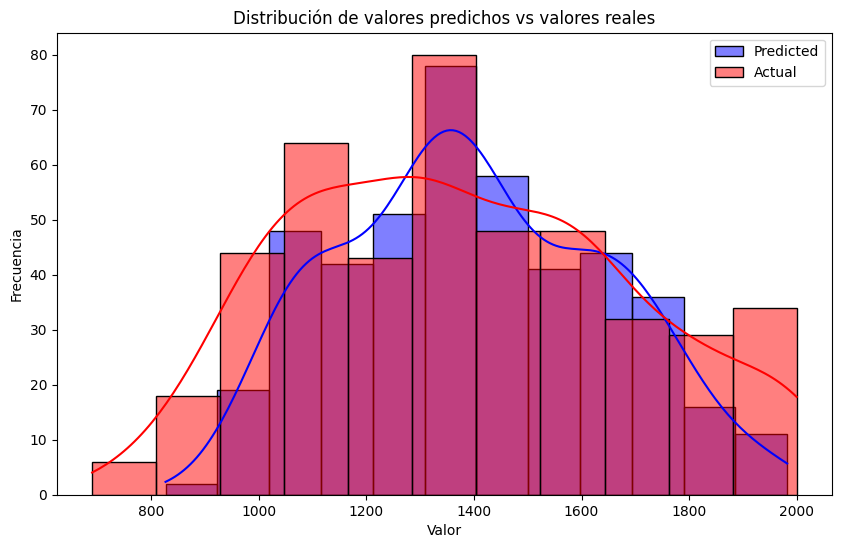

In [32]:
# Histograma de los valores predichos
model_pipeline.fit(rents_X_train, rents_y_train)
rents_y_preds = model_pipeline.predict(rents_X_test)
sales_preditected_rents = model_pipeline.predict(sales_X_test)
plt.figure(figsize=(10,6))
sns.histplot(rents_y_preds, kde=True, color='blue', label='Predicted')
sns.histplot(rents_y_test, kde=True, color='red', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

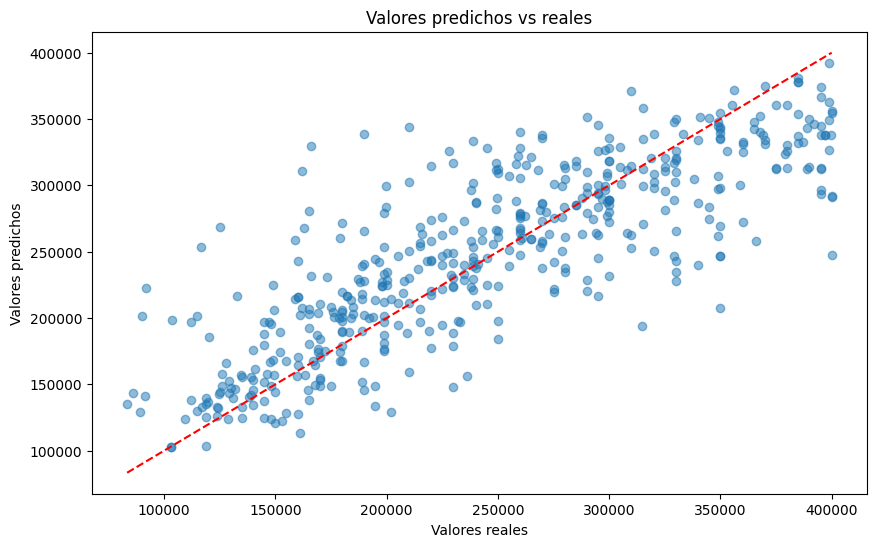

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(sales_y_test, sales_y_preds, alpha=0.5)
plt.plot([min(sales_y_test), max(sales_y_test)], [min(sales_y_test), max(sales_y_test)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


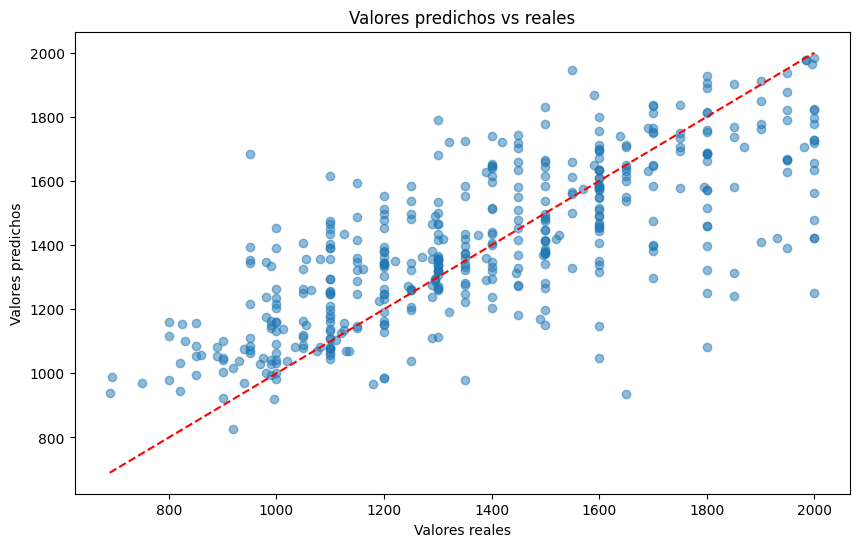

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(rents_y_test, rents_y_preds, alpha=0.5)
plt.plot([min(rents_y_test), max(rents_y_test)], [min(rents_y_test), max(rents_y_test)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


In [35]:
sales_y_test_series = pd.Series(sales_y_test, name='y', index=sales_X_test.index)
sales_y_preds_series = pd.Series(sales_y_preds, name='y_pred', index=sales_X_test.index)
sales_preditected_rents = pd.Series(sales_preditected_rents, name='rents_pred', index=sales_X_test.index)
sales_y_diff_series = sales_y_test_series - sales_y_preds_series
rents_predicted_per_real_value = sales_preditected_rents / sales_y_test_series
rents_predicted_per_stimated_value =  sales_preditected_rents / sales_y_preds_series
sales_test_pred = pd.concat([sales_X_test, sales_y_test_series, sales_y_preds_series, sales_y_diff_series.rename('y_diff'), sales_preditected_rents, rents_predicted_per_real_value.rename('rents_per_real'), rents_predicted_per_stimated_value.rename('rents_per_stimated')], axis=1)
sales_test_pred.to_csv('sales_y_pred.csv', index=False)

rents_y_test_series = pd.Series(rents_y_test, name='y', index=rents_X_test.index)
rents_y_preds_series = pd.Series(rents_y_preds, name='y_pred', index=rents_X_test.index)
rents_y_diff_series = rents_y_test_series - rents_y_preds_series
rents_test_pred = pd.concat([rents_X_test, rents_y_test_series, rents_y_preds_series, rents_y_diff_series.rename('y_diff')], axis=1)
rents_test_pred.to_csv('rents_y_pred.csv', index=False)

In [36]:
sales_test_pred

,address,bathrooms,country,distance,district,hasVideo,latitude,longitude,municipality,neighborhood,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,status,propertyType,suggestedTexts,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,bare_tittle,isBassement,y,y_pred,y_diff,rents_pred,rents_per_real,rents_per_stimated
620,barrio Guindalera,1,es,3345,Barrio de Salamanca,False,40.438821,-3.673563,Madrid,Guindalera,37,sale,106204342,Madrid,3,4828.0,{'typology': 'flat'},58.0,https://www.idealista.com/inmueble/106204342/,good,flat,"{'subtitle': 'Guindalera, Madrid', 'title': 'P...",False,False,True,False,False,CONTACTAR POR MAIL POR FAVOR! SE VENDE EN EXCE...,True,2,False,2024-10-10 12:29:05.510379,0,0,280000.0,304770.000000,-24770.000000,1424.850000,0.005089,0.004675
1278,calle de Juan Español,1,es,3319,Usera,False,40.387919,-3.710795,Madrid,Moscardó,25,sale,106193738,Madrid,2,3016.0,{'typology': 'flat'},61.0,https://www.idealista.com/inmueble/106193738/,good,flat,"{'subtitle': 'Moscardó, Madrid', 'title': 'Pis...",False,False,True,False,False,Agencia inmobiliaria de MADRID - zona USERA - ...,False,1,True,2024-10-15 09:24:03.685002,0,0,184000.0,199696.333333,-15696.333333,1185.470000,0.006443,0.005936
903,calle de José María de Pereda,1,es,4492,Ciudad Lineal,False,40.428735,-3.649679,Madrid,Ventas,1,sale,106131953,Madrid,2,1870.0,{'typology': 'flat'},60.0,https://www.idealista.com/inmueble/106131953/,good,flat,"{'subtitle': 'Ventas, Madrid', 'title': 'Piso ...",False,False,False,False,False,Oportunidad Única de Inversión - Activo Inmobi...,True,-1,False,2024-10-10 12:29:08.405055,0,1,112213.0,196848.200000,-84635.200000,1143.300000,0.010189,0.005808
298,calle de Fernández de los Ríos,1,es,2028,Chamberí,False,40.434237,-3.706892,Madrid,Arapiles,17,sale,106030009,Madrid,1,7400.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/106030009/,good,flat,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...",False,False,True,False,False,"En una zona inmejorable, ponemos a la venta es...",False,1,True,2024-10-10 12:29:02.537458,0,0,370000.0,331495.595000,38504.405000,1284.883333,0.003473,0.003876
618,calle de la Expropiación s/n,2,es,5060,Usera,True,40.371378,-3.705928,Madrid,Orcasitas,43,sale,106018655,Madrid,2,2491.0,{'typology': 'flat'},112.0,https://www.idealista.com/inmueble/106018655/,good,flat,"{'subtitle': 'Orcasitas, Madrid', 'title': 'Pi...",True,False,False,False,False,"Te presento esta elegante y luminosa vivienda,...",True,4,True,2024-10-10 12:29:05.510191,0,0,279000.0,275809.100000,3190.900000,1488.380000,0.005335,0.005396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,calle de Arcos de Jalón,1,es,7016,San Blas,False,40.422650,-3.617832,Madrid,Arcos,32,sale,103378648,Madrid,3,2186.0,{'typology': 'flat'},86.0,https://www.idealista.com/inmueble/103378648/,renew,flat,"{'subtitle': 'Arcos, Madrid', 'title': 'Piso e...",False,False,False,False,False,Globalpiso vende vivienda de 91m2 en calle Arc...,True,4,False,2024-10-10 12:29:06.375310,0,0,188000.0,227092.356667,-39092.356667,1235.600000,0.006572,0.005441
178,calle Torrox,2,es,5669,Usera,False,40.366380,-3.689487,Madrid,San Fermín,23,sale,106092935,Madrid,3,2739.0,{'typology': 'flat'},115.0,https://www.idealista.com/inmueble/106092935/,good,flat,"{'subtitle': 'San Fermín, Madrid', 'title': 'P...",False,False,True,False,False,INMONIEVES comercializa ¡Oportunidad única en...,True,1,True,2024-10-10 12:29:01.038075,0,0,315000.0,358059.970000,-43059.970000,1552.110000,0.004927,0.004335
1022,paseo de las Delicias,1,es,2147,Arganzuela,False,40.397967,-3.694099,Madrid,Delicias,17,sale,106054013,Madrid,1,4422.0,{'typology': 'flat'},45.0,https://www.idealista.com/inmueble/106054013/,good,flat,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...",False,False,False,False,False,CASA NOVA REAL